In [1]:
!pip3 install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl
%tensorflow_version 2.x

Imports


In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os 
from google.colab import drive
import cv2
from skimage import color
from skimage import io
from tensorflow import keras
from keras import layers
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model, Input
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import imageio
import io
import matplotlib.image as mpimg
from numpy import expand_dims
import glob
import argparse
import h5py
import json
from sklearn.preprocessing import LabelEncoder as le
import imgaug as ia
import imgaug.augmenters as iaa
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns

drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


Preprocessing

Using TensorFlow backend.


Mounted at /content/drive/
RESIZED (220, 220, 3)


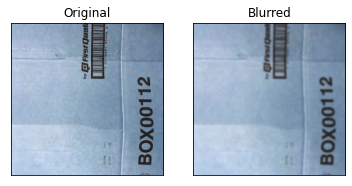

RESIZED (220, 220, 3)


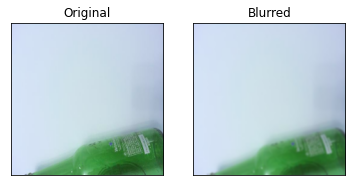

RESIZED (220, 220, 3)


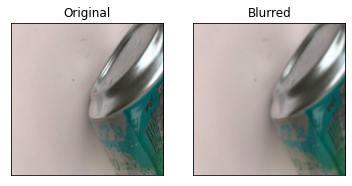

RESIZED (220, 220, 3)


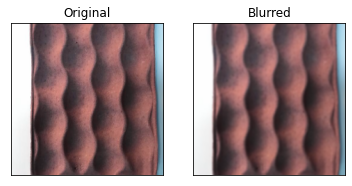

RESIZED (220, 220, 3)


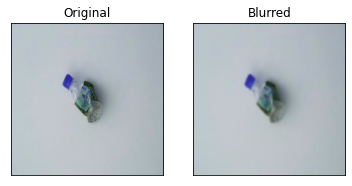

RESIZED (220, 220, 3)


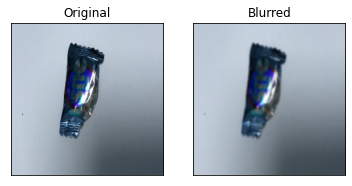

In [ ]:
drive.mount('/content/drive/', force_remount = True)

cardboard_path = "/content/drive/My Drive/MAIS 202/Garbage classification/Train/cardboard"
glass_path = "/content/drive/My Drive/MAIS 202/Garbage classification/Train/glass"
metal_path = "/content/drive/My Drive/MAIS 202/Garbage classification/Train/metal"
paper_path = "/content/drive/My Drive/MAIS 202/Garbage classification/Train/paper"
plastic_path = "/content/drive/My Drive/MAIS 202/Garbage classification/Train/plastic"
trash_path = "/content/drive/My Drive/MAIS 202/Garbage classification/Train/trash"

cardboard_output = "./drive/My Drive/MAIS 202/Preprocessed Images 2/cardboard"
glass_output = "/content/drive/My Drive/MAIS 202/Preprocessed Images 2/glass"
metal_output = "/content/drive/My Drive/MAIS 202/Preprocessed Images 2/metal"
paper_output = "/content/drive/My Drive/MAIS 202/Preprocessed Images 2/paper"
plastic_output = "/content/drive/My Drive/MAIS 202/Preprocessed Images 2/plastic"
trash_output = "/content/drive/My Drive/MAIS 202/Preprocessed Images 2/trash"


def loadImagesJPG(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, file)
                  for file in os.listdir(path)
                  if file.endswith('.jpg')])
      
    return image_files


def loadImagesPNG(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, file)
                  for file in os.listdir(path)
                  if file.endswith('.png')])
      
    return image_files

def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

res_img_c = []
def c_preprocessing (dataset, path):
    dataset = loadImagesJPG(path)

    # RESIZING IMAGES 
    height = 220
    width = 220
    dim = (width, height)
    
    #for pic in dataset: 
    img_list = [cv2.imread(i, cv2.IMREAD_UNCHANGED)for i in dataset]

    for i in range(len(img_list)):
      res = cv2.resize(img_list[i], dim, interpolation=cv2.INTER_LINEAR)
      res_img_c.append(res)

    # Checking the size
    try:
      print('RESIZED', res_img_c[1].shape)
    except AttributeError:
      print("shape not found")


    no_noise = []
    for i in range(len(res_img_c)):
      blur = cv2.GaussianBlur(res_img_c[i], (5, 5), 0)
      no_noise.append(blur)

    image = no_noise[1]
    original = res_img_c[1]
    display(original, image, 'Original', 'Blurred')


    # RGB TO GREY 
    final_preprocessed = []

    i = 1 
    for pic in no_noise: 
      gs_image = Image.fromarray(pic).convert('L')
      gs_image.save('greyscale.png')
      final_preprocessed.append(gs_image)
      cv2.imwrite(f'./drive/My Drive/MAIS 202/Preprocessed Images 2/cardboard/{i}.png', np.array(gs_image))
      i += 1 

    return final_preprocessed

res_img_g = []
def g_preprocessing (dataset, path):
    dataset = loadImagesJPG(path)

    # RESIZING IMAGES 
    height = 220
    width = 220
    dim = (width, height)
    
    #for pic in dataset: 
    img_list = [cv2.imread(i, cv2.IMREAD_UNCHANGED)for i in dataset]

    for i in range(len(img_list)):
      res = cv2.resize(img_list[i], dim, interpolation=cv2.INTER_LINEAR)
      res_img_g.append(res)

    # Checking the size
    try:
      print('RESIZED', res_img_g[1].shape)
    except AttributeError:
      print("shape not found")


    no_noise = []
    for i in range(len(res_img_g)):
      blur = cv2.GaussianBlur(res_img_g[i], (5, 5), 0)
      no_noise.append(blur)

    image = no_noise[1]
    original = res_img_g[1]
    display(original, image, 'Original', 'Blurred')


    # RGB TO GREY 
    final_preprocessed = []

    i = 1 
    for pic in no_noise: 
      gs_image = Image.fromarray(pic).convert('L')
      gs_image.save('greyscale.png')
      final_preprocessed.append(gs_image)
      cv2.imwrite(f'./drive/My Drive/MAIS 202/Preprocessed Images 2/glass/{i}.png', np.array(gs_image))
      i += 1 
    return final_preprocessed

res_img_m = []
def m_preprocessing (dataset, path):
    dataset = loadImagesJPG(path)

    # RESIZING IMAGES 
    height = 220
    width = 220
    dim = (width, height)
    
    #for pic in dataset: 
    img_list = [cv2.imread(i, cv2.IMREAD_UNCHANGED)for i in dataset]

    for i in range(len(img_list)):
      res = cv2.resize(img_list[i], dim, interpolation=cv2.INTER_LINEAR)
      res_img_m.append(res)

    # Checking the size
    try:
      print('RESIZED', res_img_m[1].shape)
    except AttributeError:
      print("shape not found")


    no_noise = []
    for i in range(len(res_img_m)):
      blur = cv2.GaussianBlur(res_img_m[i], (5, 5), 0)
      no_noise.append(blur)

    image = no_noise[1]
    original = res_img_m[1]
    display(original, image, 'Original', 'Blurred')


    # RGB TO GREY 
    final_preprocessed = []

    i = 1 
    for pic in no_noise: 
      gs_image = Image.fromarray(pic).convert('L')
      gs_image.save('greyscale.png')
      final_preprocessed.append(gs_image)
      cv2.imwrite(f'./drive/My Drive/MAIS 202/Preprocessed Images 2/metal/{i}.png', np.array(gs_image))
      i += 1 

    return final_preprocessed

res_img_pa = []
def pa_preprocessing (dataset, path):
    dataset = loadImagesJPG(path)

    # RESIZING IMAGES 
    height = 220
    width = 220
    dim = (width, height)
    
    #for pic in dataset: 
    img_list = [cv2.imread(i, cv2.IMREAD_UNCHANGED)for i in dataset]

    for i in range(len(img_list)):
      res = cv2.resize(img_list[i], dim, interpolation=cv2.INTER_LINEAR)
      res_img_pa.append(res)

    # Checking the size
    try:
      print('RESIZED', res_img_pa[1].shape)
    except AttributeError:
      print("shape not found")


    no_noise = []
    for i in range(len(res_img_pa)):
      blur = cv2.GaussianBlur(res_img_pa[i], (5, 5), 0)
      no_noise.append(blur)

    image = no_noise[1]
    original = res_img_pa[1]
    display(original, image, 'Original', 'Blurred')


    # RGB TO GREY 
    final_preprocessed = []

    i = 1 
    for pic in no_noise: 
      gs_image = Image.fromarray(pic).convert('L')
      gs_image.save('greyscale.png')
      final_preprocessed.append(gs_image)
      cv2.imwrite(f'./drive/My Drive/MAIS 202/Preprocessed Images 2/paper/{i}.png', np.array(gs_image))
      i += 1 

    return final_preprocessed

res_img_pl = []
def pl_preprocessing (dataset, path):
    dataset = loadImagesJPG(path)

    # RESIZING IMAGES 
    height = 220
    width = 220
    dim = (width, height)
    
    #for pic in dataset: 
    img_list = [cv2.imread(i, cv2.IMREAD_UNCHANGED)for i in dataset]

    for i in range(len(img_list)):
      res = cv2.resize(img_list[i], dim, interpolation=cv2.INTER_LINEAR)
      res_img_pl.append(res)

    # Checking the size
    try:
      print('RESIZED', res_img_pl[1].shape)
    except AttributeError:
      print("shape not found")


    no_noise = []
    for i in range(len(res_img_pl)):
      blur = cv2.GaussianBlur(res_img_pl[i], (5, 5), 0)
      no_noise.append(blur)

    image = no_noise[1]
    original = res_img_pl[1]
    display(original, image, 'Original', 'Blurred')


    # RGB TO GREY 
    final_preprocessed = []

    i = 1 
    for pic in no_noise: 
      gs_image = Image.fromarray(pic).convert('L')
      gs_image.save('greyscale.png')
      final_preprocessed.append(gs_image)
      cv2.imwrite(f'./drive/My Drive/MAIS 202/Preprocessed Images 2/plastic/{i}.png', np.array(gs_image))
      i += 1 

    return final_preprocessed

res_img_t = []
def t_preprocessing (dataset, path):
    dataset = loadImagesJPG(path)

    # RESIZING IMAGES 
    height = 220
    width = 220
    dim = (width, height)
    
    #for pic in dataset: 
    img_list = [cv2.imread(i, cv2.IMREAD_UNCHANGED)for i in dataset]

    for i in range(len(img_list)):
      res = cv2.resize(img_list[i], dim, interpolation=cv2.INTER_LINEAR)
      res_img_t.append(res)

    # Checking the size
    try:
      print('RESIZED', res_img_t[1].shape)
    except AttributeError:
      print("shape not found")


    no_noise = []
    for i in range(len(res_img_t)):
      blur = cv2.GaussianBlur(res_img_t[i], (5, 5), 0)
      no_noise.append(blur)

    image = no_noise[1]
    original = res_img_t[1]
    display(original, image, 'Original', 'Blurred')


    # RGB TO GREY 
    final_preprocessed = []

    i = 1 
    for pic in no_noise: 
      gs_image = Image.fromarray(pic).convert('L')
      gs_image.save('greyscale.png')
      final_preprocessed.append(gs_image)
      cv2.imwrite(f'./drive/My Drive/MAIS 202/Preprocessed Images 2/trash/{i}.png', np.array(gs_image))
      i += 1 

    return final_preprocessed


cardboard_dataset = loadImagesJPG(cardboard_path)
glass_dataset = loadImagesJPG(glass_path)
metal_dataset = loadImagesJPG(metal_path)
paper_dataset = loadImagesJPG(paper_path)
plastic_dataset = loadImagesJPG(plastic_path)
trash_dataset = loadImagesJPG(trash_path)

cardboard_preprocessed = c_preprocessing (cardboard_dataset, cardboard_path)
glass_preprocessed = g_preprocessing (glass_dataset, glass_path)
metal_preprocessed = m_preprocessing (metal_dataset, metal_path)
paper_preprocessed = pa_preprocessing (paper_dataset, paper_path)
plastic_preprocessed = pl_preprocessing (plastic_dataset, plastic_path)
trash_preprocessed = t_preprocessing (trash_dataset, trash_path)


Pretrained Model: Feature Extraction



In [9]:
drive.mount('/content/drive/', force_remount = True)
trainpath = "/content/drive/My Drive/MAIS 202/Preprocessed Images 2"

classifier_path = "/content/drive/My Drive/MAIS 202/classifier.pickle"
train_labels = os.listdir(trainpath)
print (train_labels)

#dataset = loadImagesPNG(trainpath)
#print ("Length of training dataset is: " + str(len(dataset)))

# training details 
image_size = (224, 224)
weights = "imagenet"
base_model = VGG16(weights=weights)
model = Model(base_model.input, base_model.get_layer('fc1').output)
model_path = "/content/drive/My Drive/MAIS 202/model"
features_path = "/content/drive/My Drive/MAIS 202/features.h5"
labels_path = "/content/drive/My Drive/MAIS 202/labels.h5"
test_size = 0.10
seed = 9
num_classes = 6


features = []
labels = []
le = LabelEncoder() 
le.fit ([tl for tl in train_labels])

# loop over  all labels in the folder 
count = 1 
for i, label in enumerate (train_labels): 
  print (i, label)
  cur_path = trainpath + "/" + label 
  print (cur_path)
  count = 1 
  for image_path in glob.glob(cur_path + "/*.png"):
    img = image.load_img(image_path, target_size = image_size)
    x = image.img_to_array(img)
    x = np.expand_dims (x, axis = 0)
    x = preprocess_input(x)
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)
    labels.append(label)
    print ("[INFO] processed -" + str(count))
    count += 1
  print ("[INFO] completed label -" + label)
  print (count)

print ("~~~~~")
print (labels)

le_labels = le.fit_transform(labels)
print ("+++++")
print (le_labels)
print ("[STATUS] training labels: {}".format(le_labels))
print ("[STATUS] training labels shape: {}".format(le_labels.shape))


h5f_data = h5py.File(features_path, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(features))

h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(le_labels))

h5f_data.close()
h5f_label.close()

model_json = model.to_json()
with open (model_path + str(test_size) + ".json", "w") as json_file:
  json_file.write(model_json)

model.save_weights(model_path + "_weights" + ".h5")
model.save(model_path + ".h5")
print ("[STATUS] saved model and weights to disk..")

print ("[STATUS] features and labels saved..")

Mounted at /content/drive/
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
0 cardboard
/content/drive/My Drive/MAIS 202/Preprocessed Images 2/cardboard
[INFO] processed -1
[INFO] processed -2
[INFO] processed -3
[INFO] processed -4
[INFO] processed -5
[INFO] processed -6
[INFO] processed -7
[INFO] processed -8
[INFO] processed -9
[INFO] processed -10
[INFO] processed -11
[INFO] processed -12
[INFO] processed -13
[INFO] processed -14
[INFO] processed -15
[INFO] processed -16
[INFO] processed -17
[INFO] processed -18
[INFO] processed -19
[INFO] processed -20
[INFO] processed -21
[INFO] processed -22
[INFO] processed -23
[INFO] processed -24
[INFO] processed -25
[INFO] processed -26
[INFO] processed -27
[INFO] processed -28
[INFO] processed -29
[INFO] processed -30
[INFO] processed -31
[INFO] processed -32
[INFO] processed -33
[INFO] processed -34
[INFO] processed -35
[INFO] processed -36
[INFO] processed -37
[INFO] processed -38
[INFO] processed -39
[INFO] processed -40
[INF

Training the Model


In [8]:
results = "/content/drive/My Drive/MAIS 202/results.txt"

le_labels = le.fit_transform(labels)
print ("[STATUS] training labels: {}".format(le_labels))
print ("[STATUS] training labels shape: {}".format(le_labels.shape))


h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')


features_string = h5f_data['dataset_1'][...]
labels_string = h5f_label['dataset_1'][...]

features = np.array(features_string)
labels = np.array (labels_string)

h5f_data.close()
h5f_label.close()

print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training started...")
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size = test_size,
                                                                  random_state = seed)
print ("[INFO] splitting train and test data...")
print ("[INFO] train data: {}".format (trainData.shape))
print ("[INFO] test data: {}".format (testData.shape))
print ("[INFO] train labels: {}".format (trainLabels.shape))
print ("[INFO] test labels: {}".format (testLabels.shape))

# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state = seed)
model.fit(trainData, trainLabels)
print (trainLabels)

print ("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0 
rank_5 = 0 


for (label, features) in zip (testLabels, testData):
  predictions = model.predict_proba(np.atleast_2d(features))[0]
  predictions = np.argsort (predictions) [::-1][:5]

  if label == predictions[0]:
    rank_1 += 1

  if label in predictions:
    rank_5 += 1 

rank_1 = (rank_1 / float(len(testLabels))) * 100 
rank_5 = (rank_5 / float(len(testLabels))) * 100 

rank_1 = (rank_1 / float(len(testLabels))) * 100
rank_5 = (rank_5 / float(len(testLabels))) * 100

# write accuracies to file 
f.write("Rank-1: {:.2f}%\n".format(rank_1))
f.write("Rank-5: {:.2f}%\n\n".format(rank_5))

preds = model.predict(testData)

f.write ("{}\n".format(classification_report(testLabels, preds)))
f.close()

print ("[INFO] saving model...")
pickle.dump (model, open(classifier_path, 'wb'))
model.save_weights("saved_model" + ".h5")

print ("[INFO] confusion matrix")

labels = sorted(list(os.listdir(trainpath)))

cm = confusion_matrix (testLabels, preds)
sns.heatmap (cm, annot = True, cmap = "Set2")

plt.show()



[STATUS] training labels: [0 0 0 ... 5 5 5]
[STATUS] training labels shape: (2527,)
[INFO] features shape: (2527, 4096)
[INFO] labels shape: (2527,)
[INFO] training started...
[INFO] splitting train and test data...
[INFO] train data: (2274, 4096)
[INFO] test data: (253, 4096)
[INFO] train labels: (2274,)
[INFO] test labels: (253,)
[INFO] creating model...


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[4 0 2 ... 1 0 0]
[INFO] evaluating model...
[INFO] saving model...


AttributeError: ignored

In [ ]:
# opening the pickle file to see contents 
objects = []
with (open("/content/drive/My Drive/MAIS 202/classifier.pickle", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
print (objects)

In [ ]:
filename = "/content/drive/My Drive/MAIS 202/model.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])